In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from IPython.display import Image

from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, ClassifierMixin, TransformerMixin
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler

In [3]:
data = pd.read_csv("data/train.csv")

In [4]:
data.columns

Index(['ID', 'DATE_DEPARTURE_UTC', 'DATE_ARRIVAL_UTC', 'DATE_DEPARTURE_LCL',
       'DATE_ARRIVAL_LCL', 'ORIGIN', 'ORIGIN_AIRPORT_ID', 'DEST',
       'DEST_AIRPORT_ID', 'TAIL_NUM', 'OP_CARRIER', 'OP_CARRIER_AIRLINE_ID',
       'OP_CARRIER_FL_NUM', 'DISTANCE', 'CANCELLED', 'DEP_DEL15', 'ARR_DEL15'],
      dtype='object')

In [5]:
data.dtypes

ID                         int64
DATE_DEPARTURE_UTC        object
DATE_ARRIVAL_UTC          object
DATE_DEPARTURE_LCL        object
DATE_ARRIVAL_LCL          object
ORIGIN                    object
ORIGIN_AIRPORT_ID          int64
DEST                      object
DEST_AIRPORT_ID            int64
TAIL_NUM                  object
OP_CARRIER                object
OP_CARRIER_AIRLINE_ID      int64
OP_CARRIER_FL_NUM          int64
DISTANCE                 float64
CANCELLED                  int64
DEP_DEL15                float64
ARR_DEL15                  int64
dtype: object

In [6]:
df = data.copy()
X, y = df.drop('ARR_DEL15', axis=1), df['ARR_DEL15']
X.head()

,ID,DATE_DEPARTURE_UTC,DATE_ARRIVAL_UTC,DATE_DEPARTURE_LCL,DATE_ARRIVAL_LCL,ORIGIN,ORIGIN_AIRPORT_ID,DEST,DEST_AIRPORT_ID,TAIL_NUM,OP_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER_FL_NUM,DISTANCE,CANCELLED,DEP_DEL15
0,345355,2020-01-18 22:10:00,2020-01-18 23:59:00,2020-01-18 15:10:00,2020-01-18 15:59:00,SLC,14869,SNA,14908,N128DU,DL,19790,1056,588.0,0,0.0
1,323447,2020-01-17 21:47:00,2020-01-18 04:10:00,2020-01-17 16:47:00,2020-01-17 20:10:00,BOS,10721,SEA,14747,N486AS,AS,19930,15,2496.0,0,NaN
2,242237,2020-01-13 13:26:00,2020-01-13 14:26:00,2020-01-13 07:26:00,2020-01-13 08:26:00,DAL,11259,HOU,12191,N901WN,WN,19393,3,239.0,0,NaN
3,271408,2020-01-15 02:45:00,2020-01-15 03:37:00,2020-01-14 20:45:00,2020-01-14 21:37:00,STL,15016,DSM,11423,N778SW,WN,19393,1588,259.0,0,0.0
4,282447,2020-01-15 23:22:00,2020-01-16 00:49:00,2020-01-15 18:22:00,2020-01-15 19:49:00,CLT,11057,CHS,10994,N579NN,OH,20397,5207,168.0,0,NaN


In [7]:
y.head()

0    0
1    0
2    0
3    0
4    1
Name: ARR_DEL15, dtype: int64

# EDA

ID - Id of the row

Prep: Drop

Dates
'DATE_DEPARTURE_UTC', 'DATE_ARRIVAL_UTC','DATE_DEPARTURE_LCL','DATE_ARRIVAL_LCL

1. Keep only Local timestamp
2. Tranform to Month/Day/Hour


In [8]:
print(data.DATE_DEPARTURE_LCL.unique())
print(data.DATE_DEPARTURE_LCL.value_counts())
print('Nulls',data.DATE_DEPARTURE_LCL.isnull().sum()/len(data))

['2020-01-18 15:10:00' '2020-01-17 16:47:00' '2020-01-13 07:26:00' ...
 '2020-01-07 00:26:00' '2020-01-08 01:09:00' '2020-01-17 00:49:00']
2020-01-03 05:56:00    71
2020-01-21 05:55:00    69
2020-01-09 05:55:00    68
2020-01-06 05:56:00    68
2020-01-13 05:55:00    67
                       ..
2020-01-19 00:53:00     1
2020-01-10 04:13:00     1
2020-01-05 00:05:00     1
2020-01-11 22:45:00     1
2020-01-21 23:32:00     1
Name: DATE_DEPARTURE_LCL, Length: 26687, dtype: int64
Nulls 0.0


In [9]:
class DateTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, colname):
        self.colname = colname
        
    def fit(self, x, y=None):
        return self

    def transform(self, x):
        x_copy = x.copy()
        #x_timestamp = x_copy[self.colname].apply(pd.to_datetime)
        x_copy.loc[:, self.colname+'_year'] = x_copy[self.colname].apply(pd.to_datetime).apply(lambda t: t.year)
        #col_year = "%month"%self.colname        
        x_copy.loc[:, self.colname+'_month'] = x_copy[self.colname].apply(pd.to_datetime).apply(lambda t: t.month)
        x_copy.loc[:, self.colname+'_hour']= x_copy[self.colname].apply(pd.to_datetime).apply(lambda t: t.hour)
        
        return x_copy


In [10]:
z = Pipeline(steps=[('DateTransformer',DateTransformer('DATE_DEPARTURE_LCL'))])

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

df= z.fit_transform(df)

In [11]:
df

,ID,DATE_DEPARTURE_UTC,DATE_ARRIVAL_UTC,DATE_DEPARTURE_LCL,DATE_ARRIVAL_LCL,ORIGIN,ORIGIN_AIRPORT_ID,DEST,DEST_AIRPORT_ID,TAIL_NUM,OP_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER_FL_NUM,DISTANCE,CANCELLED,DEP_DEL15,ARR_DEL15,DATE_DEPARTURE_LCL_year,DATE_DEPARTURE_LCL_month,DATE_DEPARTURE_LCL_hour
0,345355,2020-01-18 22:10:00,2020-01-18 23:59:00,2020-01-18 15:10:00,2020-01-18 15:59:00,SLC,14869,SNA,14908,N128DU,DL,19790,1056,588.0,0,0.0,0,2020,1,15
1,323447,2020-01-17 21:47:00,2020-01-18 04:10:00,2020-01-17 16:47:00,2020-01-17 20:10:00,BOS,10721,SEA,14747,N486AS,AS,19930,15,2496.0,0,NaN,0,2020,1,16
2,242237,2020-01-13 13:26:00,2020-01-13 14:26:00,2020-01-13 07:26:00,2020-01-13 08:26:00,DAL,11259,HOU,12191,N901WN,WN,19393,3,239.0,0,NaN,0,2020,1,7
3,271408,2020-01-15 02:45:00,2020-01-15 03:37:00,2020-01-14 20:45:00,2020-01-14 21:37:00,STL,15016,DSM,11423,N778SW,WN,19393,1588,259.0,0,0.0,0,2020,1,20
4,282447,2020-01-15 23:22:00,2020-01-16 00:49:00,2020-01-15 18:22:00,2020-01-15 19:49:00,CLT,11057,CHS,10994,N579NN,OH,20397,5207,168.0,0,NaN,1,2020,1,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
419482,374775,2020-01-21 00:54:00,2020-01-21 01:58:00,2020-01-20 16:54:00,2020-01-20 17:58:00,ONT,13891,OAK,13796,N278WN,WN,19393,1475,362.0,0,0.0,0,2020,1,16
419483,295665,2020-01-16 17:28:00,2020-01-16 20:18:00,2020-01-16 12:28:00,2020-01-16 15:18:00,FLL,11697,JFK,12478,N2017J,B6,20409,1202,1069.0,0,0.0,0,2020,1,12
419484,365119,2020-01-20 00:37:00,2020-01-20 03:51:00,2020-01-19 18:37:00,2020-01-19 19:51:00,IAH,12266,LAS,12889,N832UA,UA,19977,1044,1222.0,0,0.0,0,2020,1,18
419485,71648,2020-01-04 21:43:00,2020-01-05 00:19:00,2020-01-04 15:43:00,2020-01-04 19:19:00,MKE,13342,MCO,13204,N286WN,WN,19393,3487,1066.0,0,NaN,0,2020,1,15


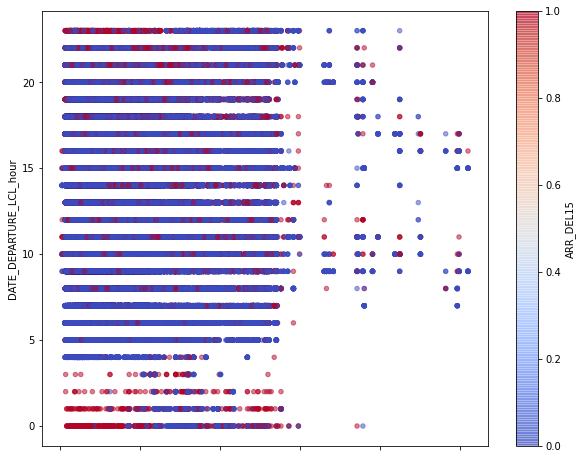

In [12]:
df.plot(kind='scatter', x='DISTANCE', y='DATE_DEPARTURE_LCL_hour', c='ARR_DEL15', colormap='coolwarm', figsize=(10, 8), alpha=.5)
plt.xlabel('Color')
# plt.ylabel('IBU')
plt.show()

Duration Flight

Airports (Origin and Destination)
1. First Shoot Keep just ID (change to category)
2. Try to use external data to get more info on airports (Country, state, Continent)


Flight Company CARRIER 
1. Keep the ID
2. Category

Flight Number ??

CANCELLED - Drop columns

DEP_DEL15 - Discriminates whether an airplane departed with delay or not

In [13]:
train_data = pd.read_csv("data/train.csv")
df = train_data.copy()
X, y = df.drop('ARR_DEL15', axis=1), df['ARR_DEL15']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.8)

X_train.head()

test_data = pd.read_csv("data/test.csv")
X_test = test_data.copy()
X_test

,ID,DATE_DEPARTURE_UTC,DATE_ARRIVAL_UTC,DATE_DEPARTURE_LCL,DATE_ARRIVAL_LCL,ORIGIN,ORIGIN_AIRPORT_ID,DEST,DEST_AIRPORT_ID,TAIL_NUM,OP_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER_FL_NUM,DISTANCE,CANCELLED,DEP_DEL15
0,425552,2020-01-23 01:26:00,2020-01-23 02:52:00,2020-01-22 20:26:00,2020-01-22 21:52:00,LGA,12953,BGR,10581,N8894A,9E,20363,5032,378.0,0,NaN
1,415418,2020-01-23 01:26:00,2020-01-23 03:04:00,2020-01-22 19:26:00,2020-01-22 22:04:00,MDW,13232,PHL,14100,N8615E,WN,19393,1168,668.0,0,NaN
2,414222,2020-01-23 01:26:00,2020-01-23 03:06:00,2020-01-22 18:26:00,2020-01-22 19:06:00,DEN,11292,LAS,12889,N7853B,WN,19393,799,628.0,0,NaN
3,421432,2020-01-23 01:26:00,2020-01-23 02:48:00,2020-01-22 17:26:00,2020-01-22 18:48:00,SJC,14831,SAN,14679,N7812G,WN,19393,4454,417.0,0,0.0
4,421356,2020-01-23 01:26:00,2020-01-23 02:24:00,2020-01-22 17:26:00,2020-01-22 18:24:00,SJC,14831,BUR,10800,N7859B,WN,19393,2024,296.0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179776,595550,2020-02-01 09:21:00,2020-02-01 14:09:00,2020-01-31 23:21:00,2020-02-01 06:09:00,KOA,12758,SFO,14771,N77430,UA,19977,1724,2367.0,0,NaN
179777,605277,2020-02-01 09:27:00,2020-02-01 14:46:00,2020-01-31 23:27:00,2020-02-01 06:46:00,LIH,12982,LAX,12892,N544US,DL,19790,1381,2615.0,0,0.0
179778,588211,2020-02-01 09:38:00,2020-02-01 14:52:00,2020-01-31 23:38:00,2020-02-01 06:52:00,KOA,12758,SEA,14747,N566AS,AS,19930,880,2688.0,0,1.0
179779,605355,2020-02-01 09:39:00,2020-02-01 14:48:00,2020-01-31 23:39:00,2020-02-01 06:48:00,HNL,12173,SEA,14747,N1611B,DL,19790,1450,2677.0,0,NaN


In [14]:
keep_columns = ['DISTANCE','DEP_DEL15']
drop_columns = X_train.columns[~ X_train.columns.isin(keep_columns)]
class DropColumns(TransformerMixin):

    
    def transform(self, X, *_):
        for colname in drop_columns:
            X = X.drop(colname, axis=1)
            
        return X
    
    def fit(self, *_):
        return self

In [15]:
numeric_features = ['DISTANCE']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler',   MinMaxScaler())]) #  MinMaxScaler() # StandardScaler()

categorical_features = ['DEP_DEL15']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value=0)),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

In [16]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

In [17]:
prep = Pipeline(steps=[('DropColumns', DropColumns()), ('preprocessor', preprocessor)])

In [18]:
prep.fit_transform(X_train)

array([[0.07780411, 1.        , 0.        ],
       [0.07464455, 1.        , 0.        ],
       [0.13823065, 1.        , 0.        ],
       ...,
       [0.04127172, 1.        , 0.        ],
       [0.11275671, 1.        , 0.        ],
       [0.08254344, 1.        , 0.        ]])

In [19]:
# Append classifier to preprocessing pipeline.
# Now we have a full prediction pipeline.
clf = Pipeline(steps=[
    ('DropColumns', DropColumns()),
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(max_depth=2, random_state=0))])

In [20]:
# Append classifier to preprocessing pipeline.
# Now we have a full prediction pipeline.
clf.fit(X_train, y_train)
y_pred_val = clf.predict(X_val)
probas = clf.predict_proba(X_val)

In [21]:
probas[:,0]

array([0.91866   , 0.91914858, 0.91914858, ..., 0.8967562 , 0.91340607,
       0.91866   ])

In [22]:
from sklearn.metrics import accuracy_score, precision_score, \
                            recall_score, f1_score, \
                            roc_auc_score, roc_curve, \
                            confusion_matrix

from matplotlib import pyplot as plt  # for the plots 

In [23]:
# advice: always use named arguments when calculating metrics 
accuracy = accuracy_score(y_true=y_val, y_pred=y_pred_val)
accuracy

0.9013796597038053

In [24]:
# advice: always use named arguments when calculating metrics
precision = precision_score(y_true=y_val, y_pred=y_pred_val)
precision

0.7593471718017935

In [25]:
# advice: always use named arguments when calculating metrics
recall = recall_score(y_true=y_val, y_pred=y_pred_val)
recall


0.4912974524722462

In [26]:
roc_auc = roc_auc_score(y_true=y_val, y_score=probas[:,1])
roc_auc

0.7491950137726493

In [27]:
fpr, tpr, thresholds = roc_curve(y_true=y_val, y_score=probas[:,1])

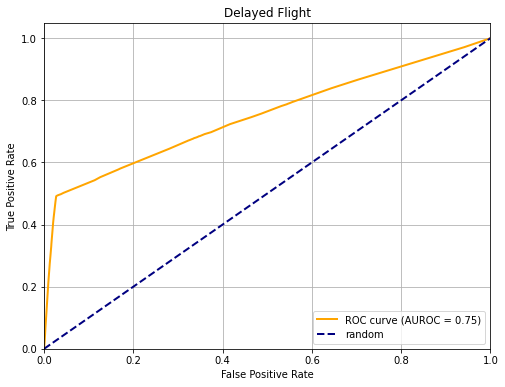

In [28]:
def plot_roc_curve(roc_auc, fpr, tpr):
    # Function to plot ROC Curve
    # Inputs: 
    #     roc_auc - AU ROC value (float)
    #     fpr - false positive rate (output of roc_curve()) array
    #     tpr - true positive rate (output of roc_curve()) array
    plt.figure(figsize=(8, 6))
    lw = 2
    plt.plot(fpr, tpr, color='orange', lw=lw, label='ROC curve (AUROC = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--', label='random')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.grid()
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Delayed Flight')
    plt.legend(loc="lower right")
    plt.show()
    
plot_roc_curve(roc_auc=roc_auc, fpr=fpr, tpr=tpr)

In [29]:
confmat = confusion_matrix(y_true=y_val, y_pred=y_pred_val)

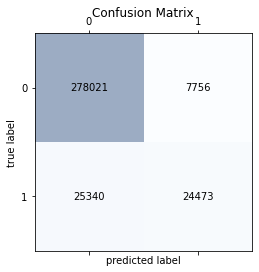

In [30]:
def make_confmat_pretty(confmat):
    # Plot the confusion matrix
    fig, ax = plt.subplots(figsize=(4, 4))
    ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.4)
    for i in range(confmat.shape[0]):
        for j in range(confmat.shape[1]):
            ax.text(x=j, y=i,
                    s=confmat[i, j],
                    va='center', ha='center')
    plt.xlabel('predicted label')
    plt.ylabel('true label')
    plt.title('Confusion Matrix')
    plt.show()
    
make_confmat_pretty(confmat=confmat)